# Notation Polonaise Inverse : Activité 3

## Introduction
Lorsque nous utilisons un langage de programmation, une expression, pour être évaluée, doit tout d'abord être analysée. C'est le rôle du **parseur**. Ce parseur permet de faire une analyse lexicale de l'expression (on ne garde que l'essentiel en s'assurant que le formatage de l'expression est correct) puis une analyse syntaxique et l'expression est transformée en un arbre de syntaxe (nous simplifierons en considérant qu'il s'agit d'un [arbre binaire](classeArbreBinaire.py) correspondant à la classe vue ensemble cette année).

Nous allons donc continuer notre séquence sur la calculatrice en essayant de comprendre l'origine de la Notation Polonaise Inverse qui, comme nous l'avons vu, correspond à l'ordre dans lequel les instructions doivent être entrées dans la calculatrice étudiée lors de la dernière séance.

## Analyse syntaxique
Pour vous aider à obtenir un arbre de syntaxe abstraite d'une expression arithmétique simple, nous vous fournissons un [parseur simple](parseurSimple.py).
Ce parseur permet d'analyser votre expression (l'entrée est une chaîne de caractères correspondant à l'expression) et il retourne l'arbre binaire correspondant.  

### Utilisation du parseur
Les priorités de calcul doivent être indiquées explicitement à l'aide des parenthèses.

Exemples :
 - `8-7/3` doit être donné sous la forme : `(8-(7/3))`
 - `2 + 3 + 4` doit être donné sous la forme : `((2 + 3) + 4)`

**Il faut un couple de parenthèses pour chaque opérateur!**  
*On peut commenter le code et/ou expliquer le fonctionnement du parseur*

In [1]:
from parseurSimple import *

expression = "((6 * (9 + 7)) + (7 - 14))"
arbre = analyseSyntaxe(expression)
print(arbre)

(+(*(6()())(+(9()())(7()())))(-(7()())(14()())))


Ci-dessous, un outil permettant d'obtenir la représentation de l'arbre binaire (ce module utilise Graphviz qui doit être installé).  

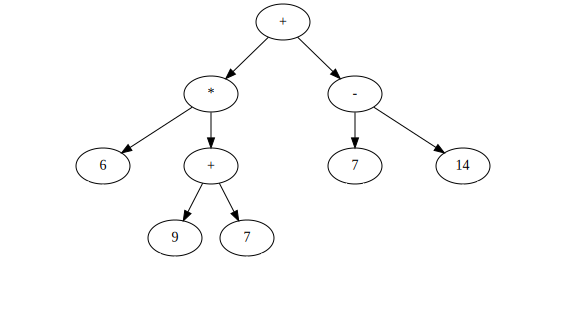

In [2]:
from visualisationArbre import *

representation(arbre)

#### Remarque
Les feuilles de l'arbre sont les opérandes et les noeuds internes des opérateurs.

#### Exercice
Observer la représentation syntaxique de certaines expressions (à la main).

### Activité
Vous devez créer une fonction permettant d'évaluer l'expression donnée à partir de l'arbre de syntaxe.  
Votre fonction prendra donc, en entrée, un arbre binaire correspondant à l'arbre de syntaxe d'une expression artithmétique et renverra un nombre correspondant à l'évaluation de l'expression arithmétique.

Par exemple :

```python
expression = "((6 * (9 + 7)) + (7 - 14))"
arbre = analyseSyntaxe(expression)
assert(evaluer(arbre) == 89)
```

Une solution possible (en utilisant la récursivité)

In [3]:
def addition(a, b):
    return a + b
def soustraction(a, b):
    return a - b
def multiplication(a, b):
    return a * b
def division(a, b):
    return a / b

operateurs = {'*' : multiplication, '+' : addition, '/' : division, '-': soustraction} # les valeurs sont des fcts

def evaluer(tree):
    """ Entrée : arbre binaire correspondant à l'arbre de syntaxe d'une expression arithmétique
    Renvoie un nombre correspondant à l'évaluation de l'expression"""
    if tree.est_feuille():        # si c'est une feuille c'est un operande
        return tree.etiquette()
    else:                         # sinon c'est un operateur : on va chercher la fonction via le dict
        return operateurs[tree.etiquette()]((evaluer(tree.gauche())),(evaluer(tree.droit())))

resultat = evaluer(arbre)
print(resultat)

89


## Parcours d'arbres
Nous allons maintenant revenir sur les parcours d'arbre étudiés cette année.

Pour rappel :

![](https://upload.wikimedia.org/wikipedia/commons/d/dc/Sorted_binary_tree_ALL.svg)

* Le rouge correspond au parcours prefixe. 
* Le jaune correspond au parcours infixe
* Le vert correspond au parcours postfixe

#### Exercice
1. En utilisant l'arbre ci-dessous :

![arbre exemple](arbre_exercice.svg)

A la main, donner la séquence des noeuds parcourus lors d'un parcours :
  
    a. préfixe
    b. infixe 
    c. postfixe
  
2. Choisissez une expression arithmétique puis utilisez l'arbre de syntaxe correspondant (obtenu à partir du parseur fourni) et, une nouvelle fois, donner la séquence des noeuds parcourus lors des trois types de parcours que vous connaissez.

#### Remarques
Le **parcours préfixe** d'un arbre binaire de syntaxe associée à une expression arithmétique correspond à la **Notation Polonaise** d'une expression arithmétique.

Le **parcours postfixe** d'un arbre binaire de syntaxe associée à une expression arithmétique correspond à la **Notation Polonaise Inverse** d'une expression arithmétique.

### Activité
Utiliser le parcours (on se limitera au parcours postixe qui est celui qui nous interesse dans cette séquence) pour exprimer les expressions sous forme NPI.

Vous devez écrire une fonction permettant d'obtenir le résultat du parcours postfixe d'un arbre binaire.  
Votre fonction prendra donc, en entrée, un arbre binaire correspondant à l'arbre de syntaxe d'une expression arithmétique et renverra une séquence (cela peut être un tableau ou une chaîne de caractères).

Une solution possible :

In [4]:
def parcours_postfixe(a):
    """ Entrée : arbre binaire correspondant à l'arbre de syntaxe d'une expression arithmétique
    Renvoie une chaîne de caractères correspondant au parcours postfixe des noeuds.
    Les noeuds sont séparés par des espaces"""
    if not a.est_vide():
        parcours_postfixe(a.gauche())
        parcours_postfixe(a.droit())
        print(a.etiquette(), end = ' ') # ou traitement

parcours_postfixe(arbre)

6 9 7 + * 7 14 - + 

## Non ambiguité de l'écriture d'une expression arithmétique
Nous allons maintenant essayer de faire l'inverse de ce qui vient d'être vu.

#### Exercice
1. Donner l'arbre binaire correspondant à la séquence `7 14 - 6 9 7 + * + ` sachant qu'il s'agit du parcours postfixe d'un arbre de syntaxe.
2. Donner l'arbre binaire correspondant à la séquence `7 - 14 + 6 * 9 + 7 ` sachant qu'il s'agit du parcours infixe d'un arbre de syntaxe. 
3. Donner l'arbre binaire correspondant à la séquence `+ - 7 14 * 6 + 9 7 ` sachant qu'il s'agit du parcours prefixe d'un arbre de syntaxe. 
4. Donner l'arbre binaire correspondant à la séquence `8 + 6 / 2 * 9 - 3 ` sachant qu'il s'agit du parcours infixe d'un arbre de syntaxe. Comparer le résultat obtenu avec celui du voisin.

Nous remarquons donc que les séquences correspondant aux parcours **prefixe** et **postfixe** permettent de reconstituer l'arbre binaire, alors que le parcours infixe ne le permet pas (on perd la priorité des calculs).

L'intérêt des Notations Polonaises est donc de permettre d'écrire de façon non ambiguë une expression arithmétique sans parenthèse, car elles permettent de traduire directement l'arbre de syntaxe.

## Conclusion
Nous avons donc vu que les notations polonaises sont associées à un type de parcours d'un arbre de syntaxe d'une expression arithmétique. Elles permettent donc d'écrire de façon non ambiguë les formules arithmétiques sans utiliser de parenthèses.

La Notation Polonaise Inverse est la notation utilisée pour la calculatrice car son utilisation permet une implémentation machine extrêmement simple à l'aide d'une pile : dès que l'on rencontre un opérateur, il suffit de dépiler les deux opérandes de la pile, effectuer le calcul puis empiler le résultat.  
Pour pouvoir utiliser la Notation Polonaise, il faudrait empiler des opérateurs (donc la pile contiendrait des nombres et des opérateurs!) puis dépiler lorsque l'on rencontre deux opérandes de suite, ... Cela rend les choses bien plus compliquée.  
Pour les curieux, voici un [simulateur](calculatriceNP.py) permettant de calculer une expression arithmétique donnée en Notation Polonaise.

### Lien avec la 1ere partie
Nous pouvons maintenant partir de notre expression arithmétique "classique" et obtenir la NPI de notre expression.

In [ ]:
expression = "((6 * (9 + 7)) + (7 - 14))"
print("Expression :", expression)
print("Séquence NPI :", end = ' ') # Rappel de la suite d'instruction
parcours_postfixe(arbre)

Nous pouvons d'ailleurs vérifier en utilisant la calculatrice élaborée dans la 1ere partie.

----
Ressource éducative libre distribuée sous :

[Licence Creative Commons Attribution - Pas d’Utilisation Commerciale - Partage dans les Mêmes Conditions 4.0 International](http://creativecommons.org/licenses/by-nc-sa/4.0/)

![Licence Creative Commons](https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png)